# Koodipaja, harjoitus 1
# Alepat

Kauppaketju Alepa on siitä mielenkiintoinen, että sitä ei pahemmin esiinny Helsingin ulkopuolella, missä S-ryhmän Sale-kaupat ovat pääasiallinen "pieni ja pitkään auki" -kauppaketju.

Fyysikoiden opiskelijahuoneella kerättiin kaikkien Alepojen koordinaatit. Tarkoituksenamme on nyt lukea Alepojen koordinaatit tiedostosta, piirtää ne, tutkia niiden välisiä etäisyyksiä ja tiheyksiä.

Täytä koodi toimivaksi kommenttien perusteella.

## t. 1 Koordinaattien lukeminen tiedostosta

Lue tiedosto `alepat.csv` Pandasin dataframeen `df`. Tiedoston ensimmäinen rivi on otsikko, joten se pitää jättää lukematta. Tiedoston muoto on CSV, joten erotinmerkkinä on pilkku. 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lue tiedosto ja tuolosta ensimmäiset rivitb
df = pd.read_csv('alepat.csv')
df = df.round(3)
df.head()

,Alepa,X,Y
0,Jätkäsaari,24.919,60.160
1,Perämiehenkatu,24.934,60.159
2,Viherniemenkatu,24.953,60.180
3,Kallio,24.947,60.185
4,Mannerheimintie,24.917,60.189


## t. 2 Indeksien muuttaminen

Alepa-sarake on sinänsä turha, tai sitten jokaisen rivin numeroindeksiä voi pitää turhana. Jokatapauksessa, vaihdetaan indeksi Alepa-sarakkeen arvoiksi.

In [38]:
# Vaihda indeksi ja tulosta uusi df
df = df.set_index("Alepa")
df.drop_duplicates(inplace=True)
df.loc["Kallio"]

X    24.947
Y    60.185
Name: Kallio, dtype: float64

## t. 3 Koordinaattien piirtäminen

Piirretään nyt Alepojen koordinaatit kartalle joko matplotlibin tai pandasin omien plottausfunktioiden avulla. Voit myös lisätä jokaiselle Alepalle sen nimen pisteen viereen (kummalla tämä onnistuu paremmin?). 

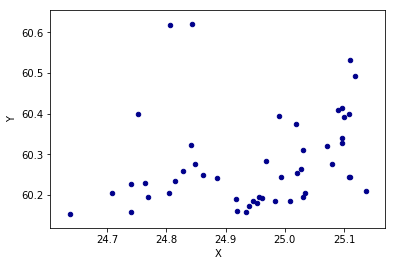

In [39]:
# Pandas
df.plot.scatter(x='X', y='Y', c='DarkBlue')

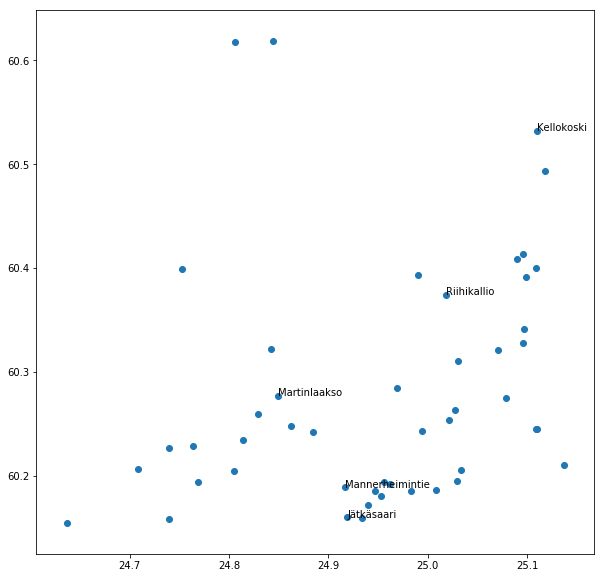

In [43]:
# Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df['X'], df['Y'])

# Nimet satunnnaisille Alepoille
for i, txt in enumerate(df.sample(5).index):
    plt.annotate(txt, (df.loc[txt]["X"], df.loc[txt]["Y"]))

plt.show()

## t. 4 Etäisyyksien laskeminen

Lasketaan nyt jokaisen Alepan etäisyys keskustan Alepaan.

In [41]:
# Laske etäisyydet keskustan alepaan ja lisää uusi sarake
df['dX'] = df['X'] - df.loc["Kallio"]['X']
df['dY'] = df['Y'] - df.loc["Kallio"]['Y']
df.head()

,X,Y,dX,dY
Alepa,,,,
Jätkäsaari,24.919,60.160,-0.028,-0.025
Perämiehenkatu,24.934,60.159,-0.013,-0.026
Viherniemenkatu,24.953,60.180,0.006,-0.005
Kallio,24.947,60.185,0.000,0.000
Mannerheimintie,24.917,60.189,-0.030,0.004
